# Automatic Number Plate recognition using YOLOv8

🔥 In this Project, we are going to fine-tune a pre-trained YOLOv8 model to detect the License Plates of different Cars


✅ Dataset used: https://universe.roboflow.com/roboflow-universe-projects/license-plate-recognition-rxg4e


🚀 Full code: https://github.com/HarshSingh2009/Automatic-Car-LICENSE-Detection

In [1]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO

import torch
import torchvision

import numpy
import cv2 as cv
import PIL

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.9/691.9 kB 5.2 MB/s eta 0:00:00


### Mount Google drive and extract Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir license_plate_dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/License Plate Recognition.v4-resized640_aug3x-accurate.yolov8.zip', 'r')
zip_ref.extractall('/content/license_plate_dataset/')
zip_ref.close()

## YOLOv8 model inference

We will load in YOLOv8 models and we are going to run a quick inference with them


In [4]:
from ultralytics import YOLO

# Load a model
infernce_model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

100%|██████████| 49.7M/49.7M [00:00<00:00, 223MB/s]


In [5]:
results = infernce_model("https://ultralytics.com/images/bus.jpg", conf=0.5, show=True, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




100%|██████████| 476k/476k [00:00<00:00, 16.9MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 176.9ms
Speed: 18.8ms preprocess, 176.9ms inference, 1068.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


In [6]:
!yolo predict model=yolov8m.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

100% 165k/165k [00:00<00:00, 11.2MB/s]
image 1/1 /content/zidane.jpg: 384x640 4 persons, 2 ties, 115.8ms
Speed: 2.1ms preprocess, 115.8ms inference, 568.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Dataset Visualization

Let's Visualize some samples in our dataset

In [7]:
import glob

# Get all train images path
train_images_path = glob.glob('/content/license_plate_dataset/train/images/*')

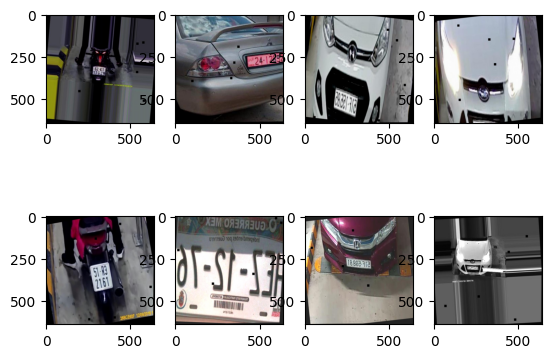

In [8]:
import random
import matplotlib.pyplot as plt

# take random sample
rows = 2
cols = 4

for idx in range(8):
  sample_img = plt.imread(random.choice(train_images_path))
  plt.subplot(rows, cols, idx+1)
  plt.imshow(sample_img)

## Fine-tuning YOLOv8 model

1. Build a YAML Configuration file as `congfig.yaml`
  * Example of Configuration file
    ```
    %%writefile config.yaml

    # PATHS
    path: /content/license_plate_dataset
    train: train/images/
    val: valid/images/
    test: test/images/

    # Classes
    names:
      0: License_Plate
    ```

2. Load in Pre-trained YOLOv8 model from ultraltics and train it

In [9]:
%%writefile google_colab_config.yaml

# PATHS
path: /content/license_plate_dataset
train: train/images/
val: valid/images/
test: test/images/

# Classes
names:
 0: License_Plate

Writing google_colab_config.yaml


In [10]:
# Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [11]:
!mkdir '/content/drive/My Drive/license_plate_detection_train_results/'

mkdir: cannot create directory ‘/content/drive/My Drive/license_plate_detection_train_results/’: File exists


In [12]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO("yolov8m.yaml").to(device)  # build a new model from scratch

# Use the model
model.train(data=os.path.join('/content', "google_colab_config.yaml"), epochs=15)  # train the model


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

100%|██████████| 755k/755k [00:00<00:00, 30.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 137MB/s]


AMP: checks passed ✅


train: Scanning /content/license_plate_dataset/train/labels... 21173 images, 28 backgrounds, 0 corrupt: 100%|██████████| 21173/21173 [00:10<00:00, 2100.86it/s]


train: New cache created: /content/license_plate_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/license_plate_dataset/valid/labels... 2046 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:01<00:00, 1134.96it/s]


val: New cache created: /content/license_plate_dataset/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      7.17G      1.919      1.757       2.44          8        640: 100%|██████████| 1324/1324 [11:55<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:33<00:00,  1.91it/s]

                   all       2046       2132      0.913      0.814      0.858      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.38G      1.453     0.9976      1.843         13        640: 100%|██████████| 1324/1324 [11:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.05it/s]

                   all       2046       2132      0.915      0.859      0.908       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.41G      1.375     0.8848      1.767          8        640: 100%|██████████| 1324/1324 [11:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:30<00:00,  2.07it/s]

                   all       2046       2132       0.95      0.876       0.93      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.41G      1.325     0.8119      1.714          8        640: 100%|██████████| 1324/1324 [11:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.03it/s]

                   all       2046       2132      0.958      0.886      0.944       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      7.41G      1.286     0.7632      1.681         10        640: 100%|██████████| 1324/1324 [11:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.01it/s]

                   all       2046       2132      0.961      0.903      0.954      0.608


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.41G      1.206     0.6269      1.714          5        640: 100%|██████████| 1324/1324 [11:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:32<00:00,  1.99it/s]

                   all       2046       2132      0.952      0.917      0.953      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.42G      1.173     0.5967      1.682          5        640: 100%|██████████| 1324/1324 [11:31<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:32<00:00,  1.98it/s]

                   all       2046       2132      0.959      0.916      0.962      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      7.42G      1.157     0.5661      1.669          5        640: 100%|██████████| 1324/1324 [11:24<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.01it/s]

                   all       2046       2132      0.961      0.925       0.96      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.42G       1.14     0.5438      1.649          5        640: 100%|██████████| 1324/1324 [11:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.02it/s]

                   all       2046       2132      0.972      0.921      0.964       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      7.42G      1.119     0.5205      1.635          4        640: 100%|██████████| 1324/1324 [11:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.02it/s]

                   all       2046       2132      0.978      0.933      0.973      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      7.43G      1.105     0.4993      1.612          9        640: 100%|██████████| 1324/1324 [11:28<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.05it/s]

                   all       2046       2132       0.98      0.934      0.976       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.42G      1.087     0.4816      1.597          5        640: 100%|██████████| 1324/1324 [11:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.00it/s]

                   all       2046       2132      0.975      0.937      0.972      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      7.42G      1.069     0.4625      1.572          5        640: 100%|██████████| 1324/1324 [11:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.04it/s]

                   all       2046       2132      0.976      0.941      0.977       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.42G      1.054      0.449      1.556          5        640: 100%|██████████| 1324/1324 [11:25<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.05it/s]

                   all       2046       2132      0.981      0.947      0.977      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.43G      1.033     0.4315      1.542          6        640: 100%|██████████| 1324/1324 [11:23<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:31<00:00,  2.03it/s]

                   all       2046       2132      0.981      0.939      0.977      0.682



15 epochs completed in 3.020 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.237 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:35<00:00,  1.83it/s]


                   all       2046       2132      0.981      0.939      0.977      0.682
Speed: 0.3ms preprocess, 10.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bd18e8e1780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
import shutil
import os

def move_folder(source_folder, destination_folder):
    """Moves an existing folder to a new location.

    Args:
        source_folder (str): The path to the folder to be moved.
        destination_folder (str): The path to the destination folder.

    Raises:
        FileNotFoundError: If the source folder doesn't exist.
        OSError: If there's an error moving the folder.
    """

    if not os.path.exists(source_folder):
        raise FileNotFoundError(f"Source folder not found: {source_folder}")

    try:
        shutil.move(source_folder, destination_folder)
        print(f"Folder moved successfully from {source_folder} to {destination_folder}")
    except OSError as e:
        raise OSError(f"Error moving folder: {e}") from e

# testing it
source_path = "/content/sample_data"
destination_path = "/content/drive/MyDrive/license_plate_detection_train_results"

move_folder(source_path, destination_path)

Folder moved successfully from /content/sample_data to /content/drive/MyDrive/license_plate_detection_train_results
